In [1]:
import os
import theano
import calendar
from theano import *
import theano.tensor as tt
from theano.compile.ops import as_op
import matplotlib.pyplot as plt
from argparse import Namespace
import pandas as pd
import numpy as np
import pymc3 as pm
import argparse
import pickle
import json
import math
import sys 

In [2]:
# Get current working directory and project root directory
cwd = os.getcwd()
rd = os.path.join(cwd.split('fibe2-mini-project/', 1)[0])
if not rd.endswith('fibe2-mini-project'):
    rd = os.path.join(cwd.split('fibe2-mini-project/', 1)[0],'fibe2-mini-project')

In [ ]:
rawdata = pd.read_csv(os.path.join(rd,'data','input','raw','road_data.csv'))
rawdata = rawdata.drop(columns=['time','net_rainfall'])
rawdata['date'] = pd.to_datetime(rawdata['date'])
rawdata = rawdata.set_index('date')

In [ ]:
monthly_rawdata = rawdata.groupby(pd.Grouper(freq='M')).mean()
monthly_rawdata = monthly_rawdata.reset_index()
monthly_rawdata['time'] = range(1,monthly_rawdata.shape[0]+1)
monthly_rawdata['net_rainfall'] = monthly_rawdata['rainfall']-monthly_rawdata['evapotranspiration']
monthly_rawdata['net_rainfall'] = monthly_rawdata['net_rainfall'].apply(lambda x: max(x,0.0))

In [ ]:
monthly_rawdata.to_csv(os.path.join(rd,'data','input','raw','road_data_monthly.csv'))

In [ ]:
monthly_rawdata['time_label'] = monthly_rawdata['date'].apply(lambda x: f'{calendar.month_abbr[x.month]}-{str(x.year)[-2:]}')

# Plot simulations

In [4]:
model0data = pd.read_csv(os.path.join(rd,'data','output','simulations','linear_reservoir_simulation_monthly.csv'))
model1data = pd.read_csv(os.path.join(rd,'data','output','simulations','nonlinear_reservoir_simulation_monthly.csv'))
model2data = pd.read_csv(os.path.join(rd,'data','output','simulations','hymod_simulation_monthly.csv'))

model0data['date'] = pd.to_datetime(model0data['date'])
model1data['date'] = pd.to_datetime(model1data['date'])
model2data['date'] = pd.to_datetime(model2data['date'])

model0data['time_label'] = model0data['date'].apply(lambda x: f'{calendar.month_abbr[x.month]}-{str(x.year)[-2:]}')
model1data['time_label'] = model1data['date'].apply(lambda x: f'{calendar.month_abbr[x.month]}-{str(x.year)[-2:]}')
model2data['time_label'] = model2data['date'].apply(lambda x: f'{calendar.month_abbr[x.month]}-{str(x.year)[-2:]}')

In [5]:
# plt.hist(model2data['discharge'],bins=3)
# plt.hist(model0data['discharge'],bins=3)

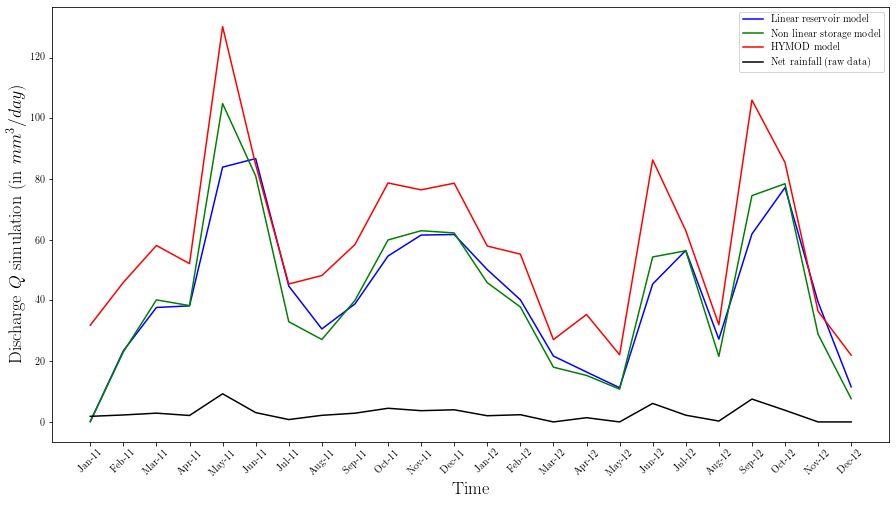

In [11]:
plt.figure(figsize=(15,8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(model0data['time'],model0data['discharge'],color='b',label=r'Linear reservoir model')
plt.plot(model1data['time'],model1data['discharge'],color='g',label=r'Non linear storage model')
plt.plot(model2data['time'],model2data['discharge'],color='r',label=r'HYMOD model')
plt.plot(model0data['time'],model0data['net_rainfall'],color='k',label=r'Net rainfall (raw data)')
plt.xlabel(r'Time',fontsize=18)
plt.ylabel(r"Discharge $Q$ simulation (in $mm^3/day$)",fontsize=18)
plt.xticks(ticks=model0data['time'].tolist(),labels=model0data['time_label'].tolist(),rotation=45)
plt.legend()
plt.savefig(os.path.join(rd,'data','figures','3simulated_data.png'))

plt.show()